# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

df.head()


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\msnfa\AppData\Local\Temp\ipykernel_12804\1021130598.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('Data\hotel_bookings.csv')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Bentuk Dataset: (119390, 32)

Tipe Data:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       

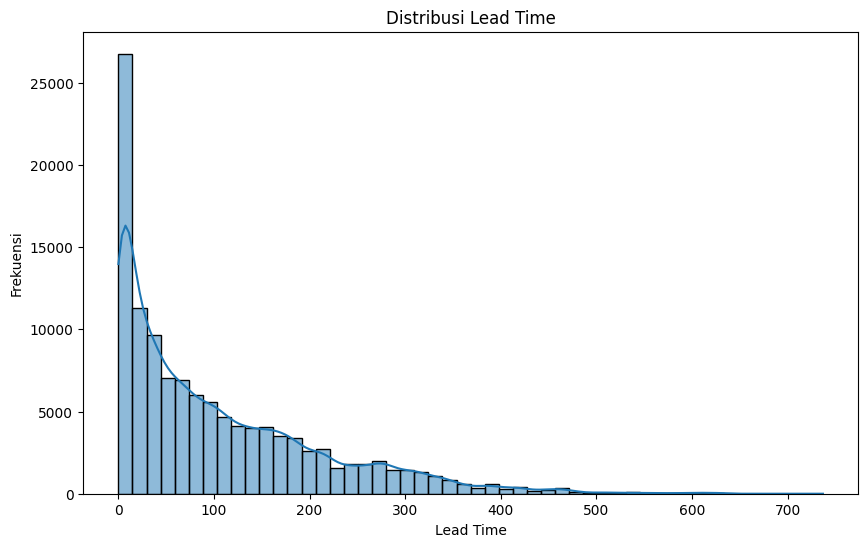

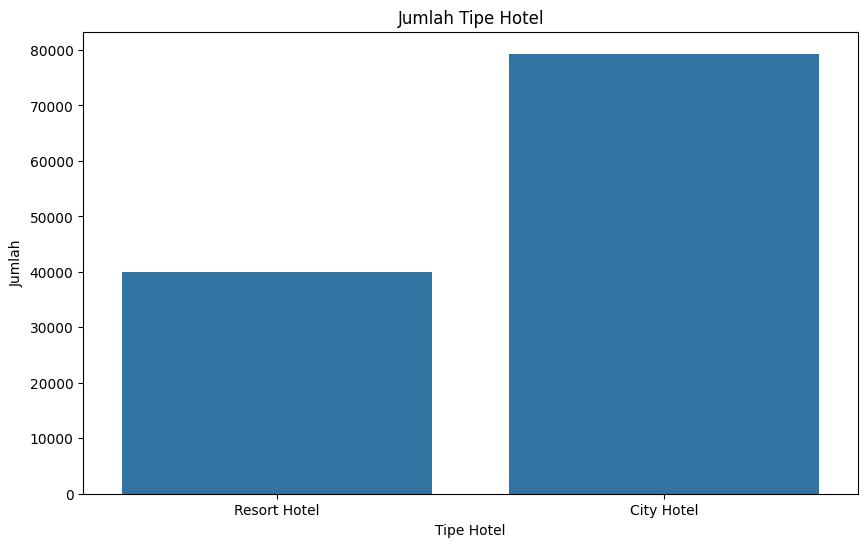

In [3]:
print('Bentuk Dataset:', df.shape)

print('\nTipe Data:')
print(df.dtypes)

print('\nNilai Hilang:')
print(df.isnull().sum())

print('\nRingkasan Statistik:')
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribusi Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel')
plt.title('Jumlah Tipe Hotel')
plt.xlabel('Tipe Hotel')
plt.ylabel('Jumlah')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [4]:
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print('\nNilai Hilang sebelum preprocessing:')
print(df.isnull().sum())
df.drop(columns=['company', 'agent', 'reservation_status', 'reservation_status_date'], inplace=True)
df.dropna(inplace=True)
print('\nNilai Hilang setelah preprocessing:')
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
df_scaled_numerical = scaler.fit_transform(df[numerical_cols])
df_preprocessed = np.hstack((df_scaled_numerical, df[categorical_cols].values))
print('\nBentuk data setelah preprocessing:', df_preprocessed.shape)



Nilai Hilang sebelum preprocessing:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
com

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [7]:
range_n_clusters = list(range(2, 11))

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_preprocessed)
    silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, rata-rata silhouette_score adalah: {silhouette_avg:.4f}")


Untuk n_clusters = 2, rata-rata silhouette_score adalah: 0.7684
Untuk n_clusters = 3, rata-rata silhouette_score adalah: 0.5901
Untuk n_clusters = 4, rata-rata silhouette_score adalah: 0.6401
Untuk n_clusters = 5, rata-rata silhouette_score adalah: 0.5693
Untuk n_clusters = 6, rata-rata silhouette_score adalah: 0.5305
Untuk n_clusters = 7, rata-rata silhouette_score adalah: 0.3414
Untuk n_clusters = 8, rata-rata silhouette_score adalah: 0.2994
Untuk n_clusters = 9, rata-rata silhouette_score adalah: 0.2715
Untuk n_clusters = 10, rata-rata silhouette_score adalah: 0.2423


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

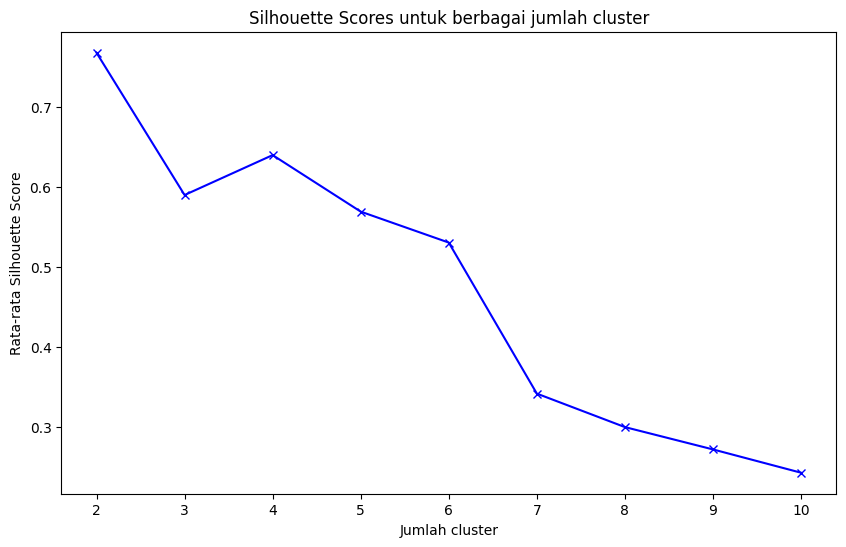


Jumlah cluster optimal: 2 dengan silhouette score: 0.7684


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Rata-rata Silhouette Score')
plt.title('Silhouette Scores untuk berbagai jumlah cluster')
plt.show()

optimal_n_clusters = None
for n_clusters, score in zip(range_n_clusters, silhouette_scores):
    if score >= 0.70:
        optimal_n_clusters = n_clusters
        break

if optimal_n_clusters:
    print(f"\nJumlah cluster optimal: {optimal_n_clusters} dengan silhouette score: {score:.4f}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [9]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

silhouette_scores_pca = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores_pca.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, rata-rata silhouette_score setelah PCA adalah: {silhouette_avg:.4f}")


Untuk n_clusters = 2, rata-rata silhouette_score setelah PCA adalah: 0.7994
Untuk n_clusters = 3, rata-rata silhouette_score setelah PCA adalah: 0.6543
Untuk n_clusters = 4, rata-rata silhouette_score setelah PCA adalah: 0.7218
Untuk n_clusters = 5, rata-rata silhouette_score setelah PCA adalah: 0.6741
Untuk n_clusters = 6, rata-rata silhouette_score setelah PCA adalah: 0.6622
Untuk n_clusters = 7, rata-rata silhouette_score setelah PCA adalah: 0.5278
Untuk n_clusters = 8, rata-rata silhouette_score setelah PCA adalah: 0.5686
Untuk n_clusters = 9, rata-rata silhouette_score setelah PCA adalah: 0.5450
Untuk n_clusters = 10, rata-rata silhouette_score setelah PCA adalah: 0.5192


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

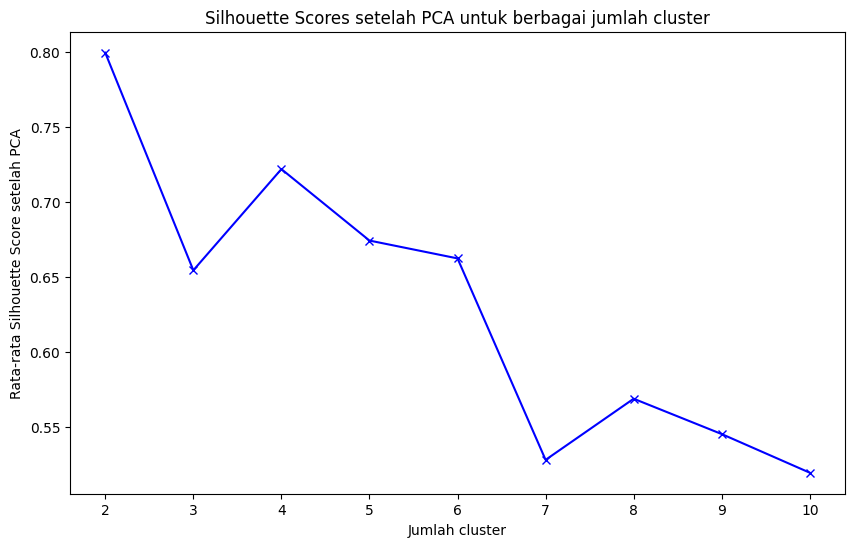


Jumlah cluster optimal setelah PCA: 2 dengan silhouette score: 0.7994


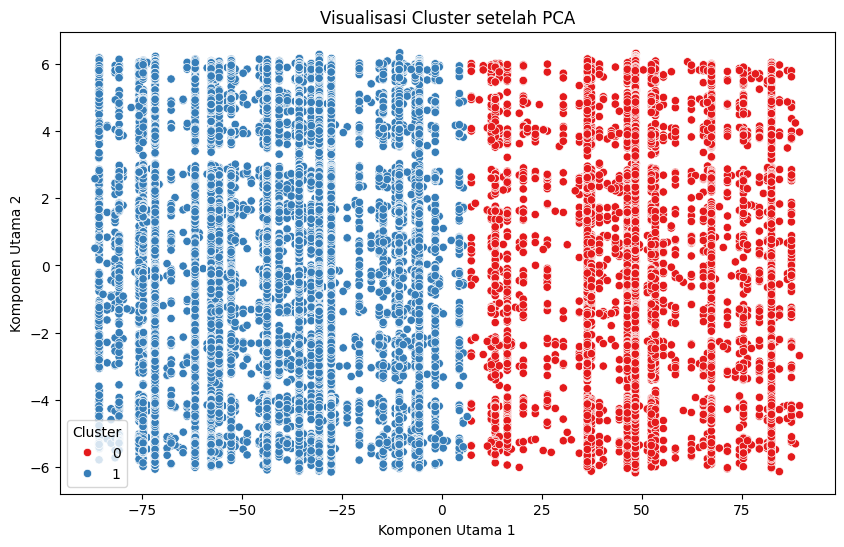

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_pca, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Rata-rata Silhouette Score setelah PCA')
plt.title('Silhouette Scores setelah PCA untuk berbagai jumlah cluster')
plt.show()

optimal_n_clusters_pca = None
for n_clusters, score in zip(range_n_clusters, silhouette_scores_pca):
    if score >= 0.70:
        optimal_n_clusters_pca = n_clusters
        break

if optimal_n_clusters_pca:
    print(f"\nJumlah cluster optimal setelah PCA: {optimal_n_clusters_pca} dengan silhouette score: {score:.4f}")

kmeans = KMeans(n_clusters=optimal_n_clusters_pca, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels, palette='Set1')
plt.title('Visualisasi Cluster setelah PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [11]:
df['Cluster'] = cluster_labels
for cluster in range(optimal_n_clusters_pca):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe().to_string())



Cluster 0:
              hotel   is_canceled     lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights        adults      children        babies          meal       country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  customer_type           adr  required_car_parking_spaces  total_of_special_requests  Cluster
count  36300.000000  36300.000000  36300.000000       36300.000000        36300.000000              36300.000000               36300.000000             36300.000000          36300.000000  36300.000000  36300.000000  36300.000000  36300.000000  36300.000000    36300.000000          36300.000000       36300.000000            36300.000000                    36300.000000        36300.000000        36300.000000     36300.000000  363

# Interpretasi Cluster

## **1. Cluster 0**
### **Distribusi Data:**
- Jumlah data: **36,300** (41.7% dari total data).
- Lead time rata-rata: **68.96 hari**, lebih pendek dibandingkan Cluster 1.
- Rata-rata harga reservasi (ADR): **101.17**, lebih rendah dibandingkan Cluster 1.
- Rata-rata permintaan khusus: **0.64** per reservasi.

### **Karakteristik Utama:**
- Lebih cenderung melakukan pembatalan (**33.28%** reservasi dibatalkan).
- Durasi menginap di hari kerja (**2.36 malam**) sedikit lebih rendah dibandingkan Cluster 1.
- Lebih sering memesan tanpa deposit.
- Sedikit lebih banyak permintaan parkir mobil dibandingkan Cluster 1.

### **Wawasan:**
- Cluster ini mungkin mencakup pelanggan dengan reservasi lebih pendek, anggaran lebih rendah, dan kebutuhan parkir lebih sering.
- Strategi untuk menurunkan tingkat pembatalan di cluster ini bisa difokuskan pada **insentif awal reservasi**.

---

## **2. Cluster 1**
### **Distribusi Data:**
- Jumlah data: **50,640** (58.3% dari total data).
- Lead time rata-rata: **88.25 hari**, lebih panjang dibandingkan Cluster 0.
- Rata-rata harga reservasi (ADR): **110.45**, lebih tinggi dibandingkan Cluster 0.
- Rata-rata permintaan khusus: **0.75** per reservasi.

### **Karakteristik Utama:**
- Tingkat pembatalan lebih rendah (**23.52%** reservasi dibatalkan).
- Durasi menginap lebih panjang, baik di hari kerja (**2.82 malam**) maupun akhir pekan (**1.10 malam**).
- Lebih sedikit permintaan parkir mobil dibandingkan Cluster 0.

### **Wawasan:**
- Cluster ini terdiri dari pelanggan yang memesan lebih jauh sebelumnya, dengan rata-rata anggaran yang lebih tinggi.
- Strategi untuk mempertahankan pelanggan ini dapat melibatkan **layanan tambahan premium** untuk memperkuat loyalitas mereka.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
df.to_csv('clustering_results.csv', index=False)
